# World Happiness Report

## Project Description

 The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## What is Dystopia?

 Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


## What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.


## What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [110]:
#size of dataset
df.shape

(158, 12)

## Data Summary

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are three types of data (object,float64,int64) present in datatype

## Metadata about features

Country: Name of the country.

Region : Region the country belongs to

Happiness Rank: A rank given to the country to describe its happiness level.

Happiness Score: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

Happiness Rank: Rank of the country based on the Happiness Score.

Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.

Family(Social Support): The extent to which Family contributes to the calculation of the Happiness Score

Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score

Freedom (to Make Life Choices): Represent the satisfaction level of the population's freedom to choose what to do with their life

Trust (Government Corruption): The measure of how people think about how corruption in the country is, or the level of trust in government.


In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


some countries have min values of 0.

## Finding Null Values

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

The data shows no null values, appearing to be relatively clean

## Dealing with outliers

In [13]:
col_list=['Economy (GDP per Capita)',
   'Family', 'Health (Life Expectancy)',
   'Freedom', 'Generosity',
   'Trust (Government Corruption)']

### Outlier Visualization

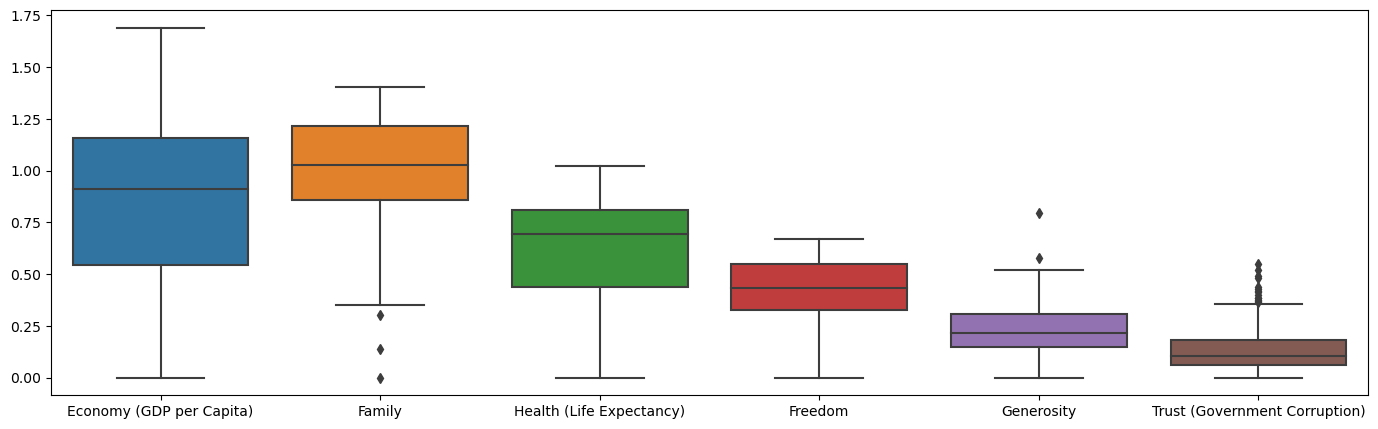

In [14]:
plt.figure(figsize=(17,5))
sns.boxplot(data=df[col_list])
# plt.xticks(rotation=90)
plt.show()

The figure shows that there are outliers in column "Family", "Generosity", and "Trust (Government corruption)"

## Dropping outliers

In [15]:
def get_outlier(data, weight=1.5):
    lower=np.percentile(data,25)
    upper=np.percentile(data,75)
    iqr=upper-lower
    l=lower-weight*iqr
    u=upper+weight*iqr
    return {
        "lower":l,
        "upper":u
    }
df_o=df.copy()
for col in col_list:
    o_info=get_outlier(df[col])
    print(col,len(df[(df[col]>o_info["upper"]) | (df[col]<o_info["lower"])]))
    df_o=df_o[(df_o[col]<o_info["upper"]) & (df_o[col]>o_info["lower"])]


Economy (GDP per Capita) 0
Family 3
Health (Life Expectancy) 0
Freedom 0
Generosity 2
Trust (Government Corruption) 14


In [16]:
df_o.reset_index(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

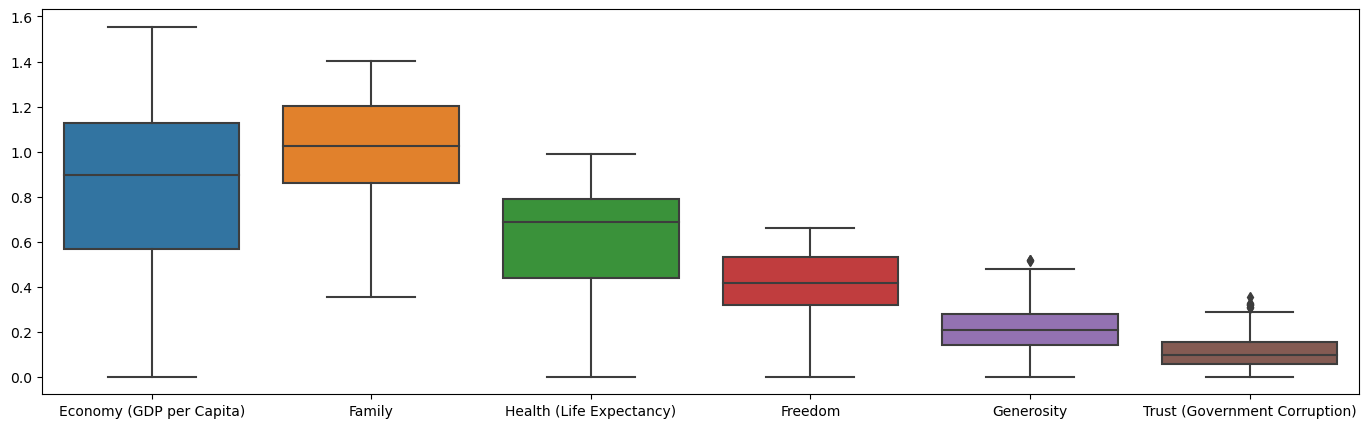

In [17]:
plt.figure(figsize=(17,5))
sns.boxplot(data=df_o[col_list])
# plt.xticks(rotation=90)
plt.show

## Making new dataframe considering Numerical datatypes for further investigation.

In [112]:
Happiness_index = df[df.columns[3:]]
Happiness_index

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [113]:
X=Happiness_index.drop(columns=['Happiness Score'])
Y=Happiness_index['Happiness Score']

## EDA (Exploratory Data Analysis)

Skewness detection using distplot and skew()

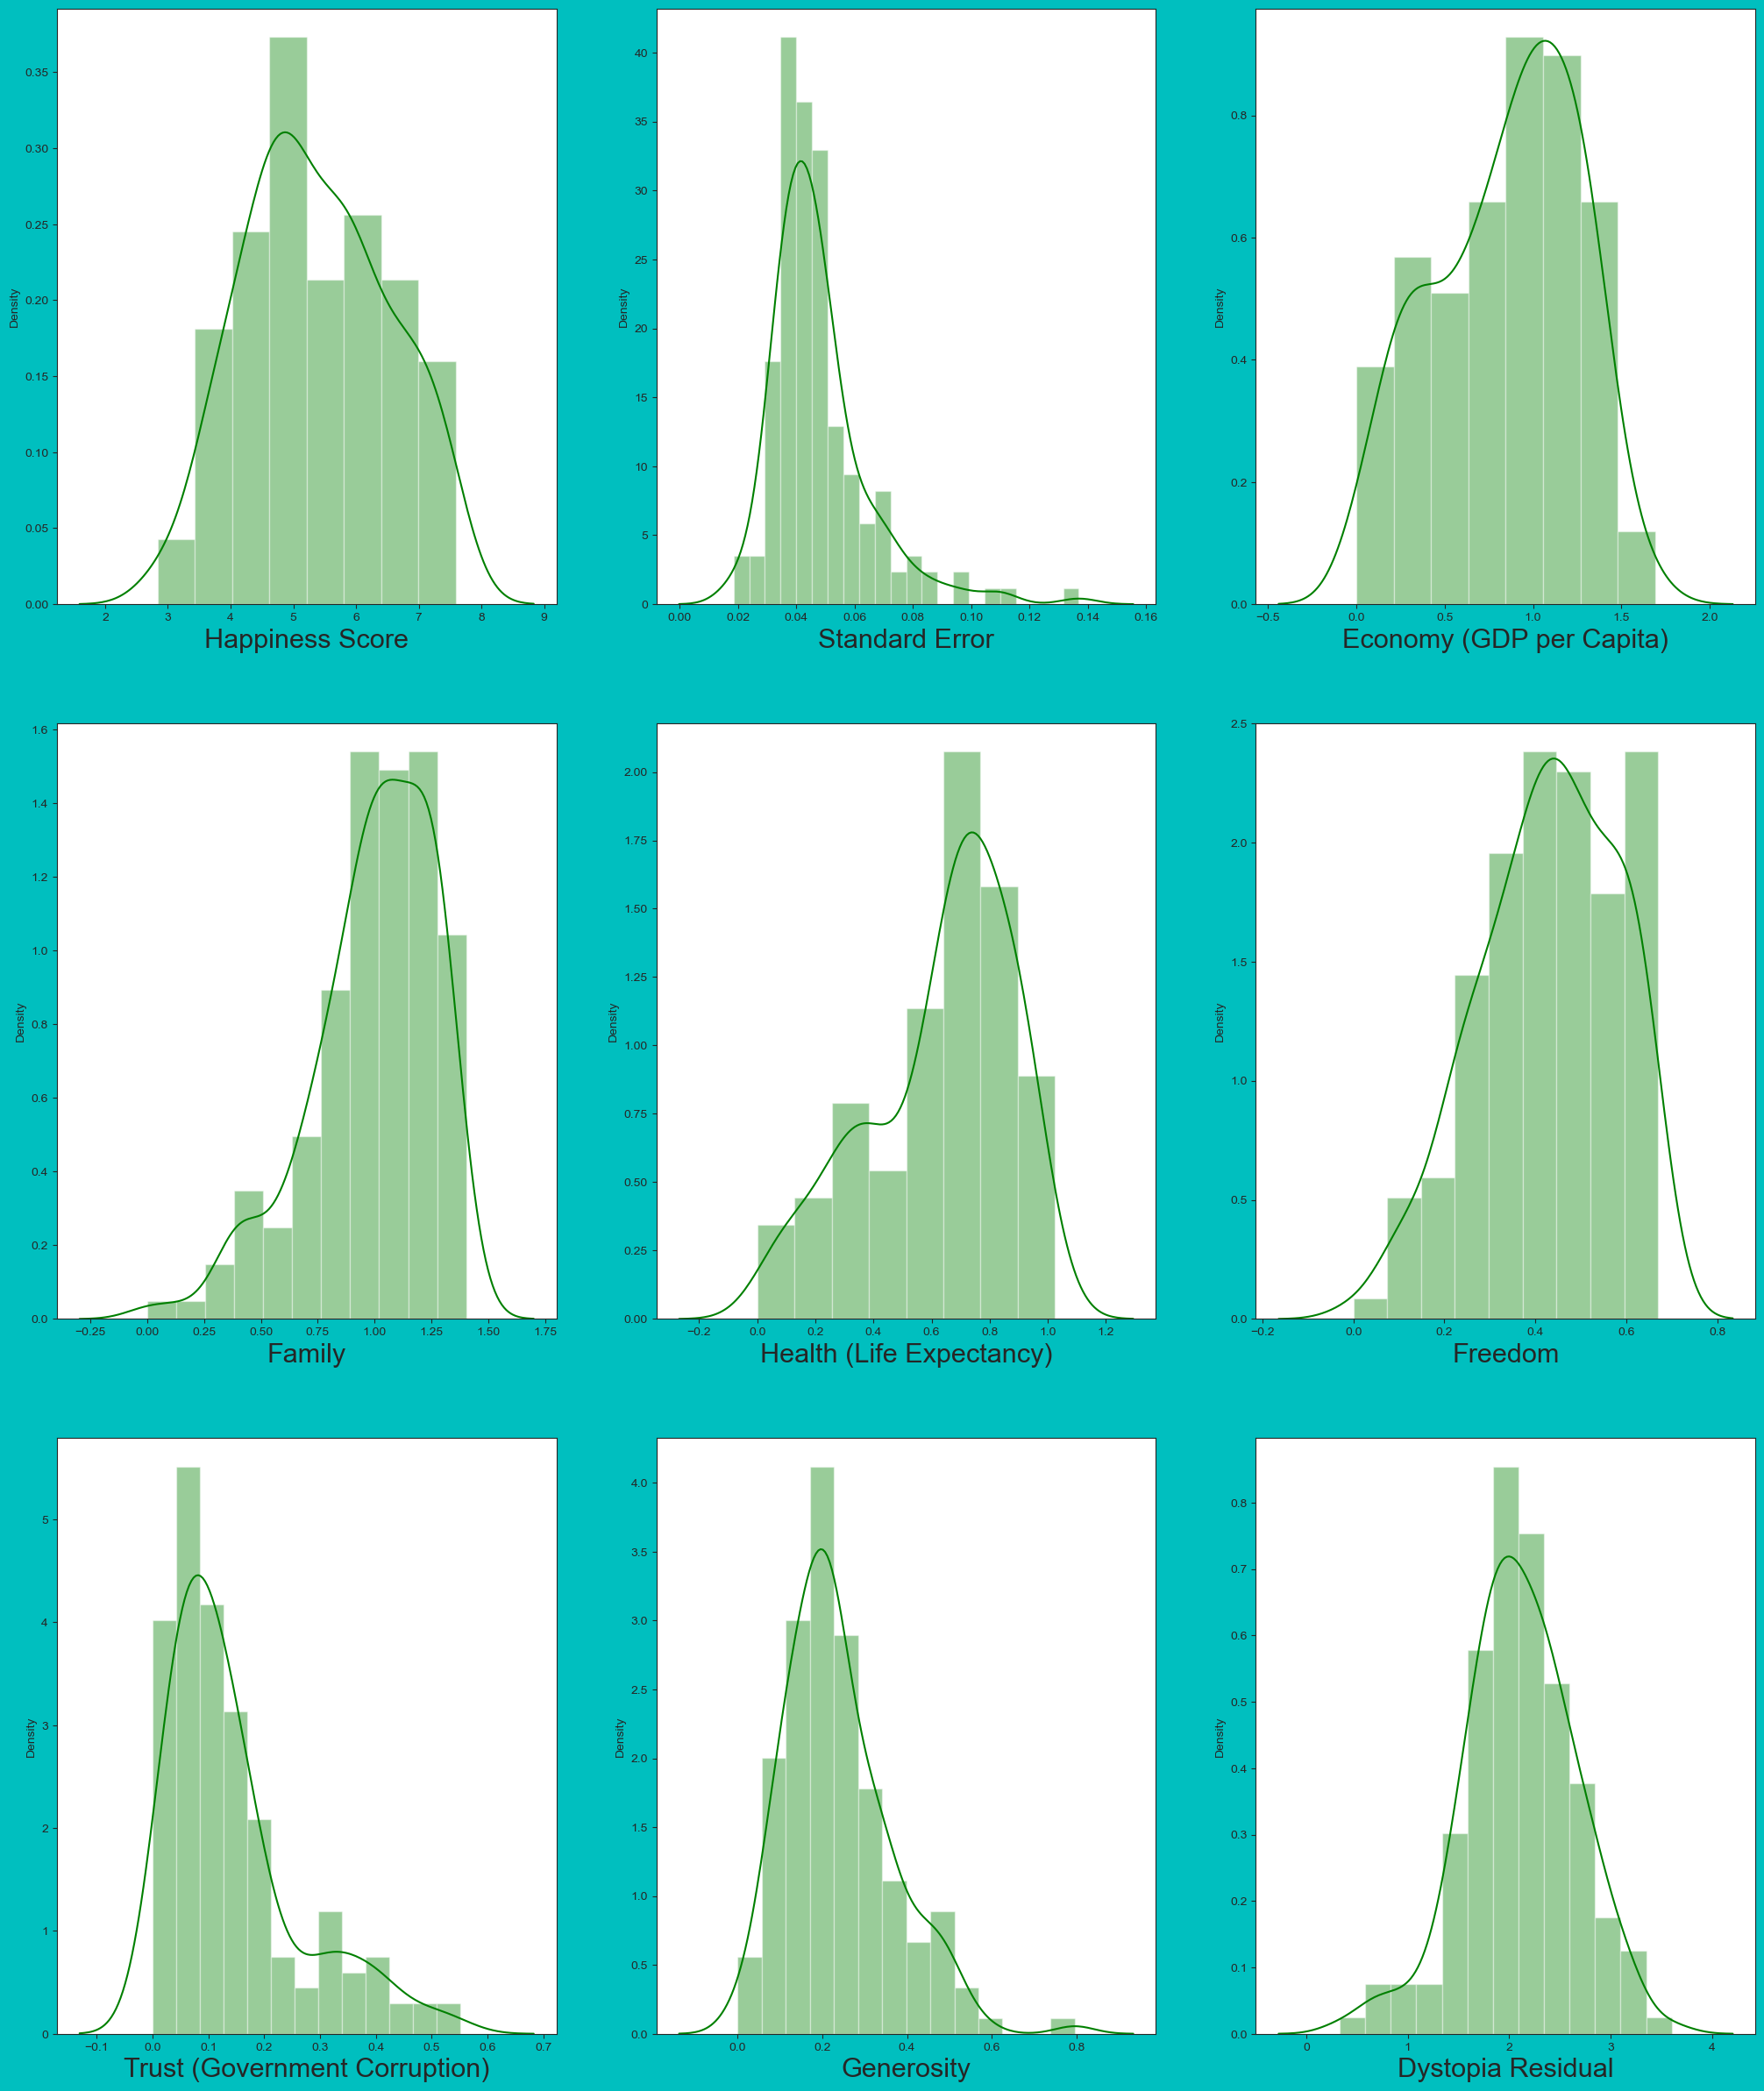

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,30), facecolor='c')
plotnumber=1
for column in Happiness_index:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(Happiness_index[column], color='g')
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.show()

In [117]:
df.select_dtypes(include='float').skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see that standard Error, Trust, Generosity are right skewed distribution. As we know Log transform is useful only if the distribution of the variable is right-skewed.A log transformation in a left-skewed distribution will tend to make it even more left skew. Family variable has left skewed distribution.

In [118]:
from scipy.stats import boxcox

Log transform = 0 square root transform = 0.5

In [119]:
Happiness_index['Standard Error']=boxcox(Happiness_index['Standard Error'],0)
# checking skewness after applying boxcox
df.select_dtypes(include='float').skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

## Top 10 countries happiest countries based on Happiness rank

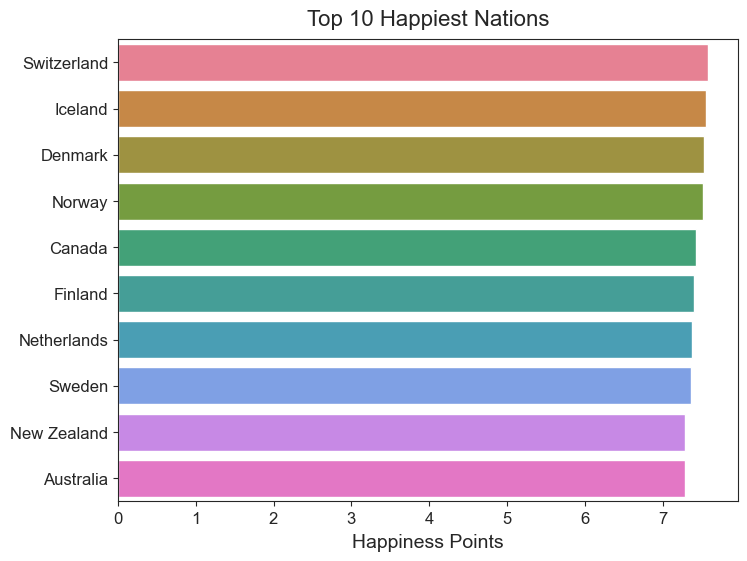

In [120]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Happiness Score', y='Country', data=df.head(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Top 10 Happiest Nations", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


In [121]:
A=df.sort_values(by='Happiness Score', ascending=False).head(10)
A

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can see that Switzerland is at top with Happiness score of 7.587. We can see that 8 countries out of 10 are from Western Europe.

## Bottom 10 countries happiest countries based on Happiness rank.

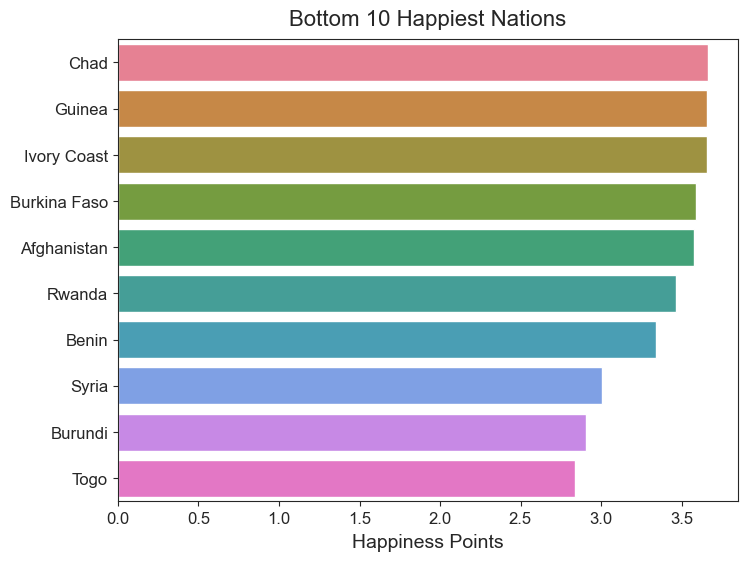

In [122]:
# Set the figure size
plt.figure(figsize = (8,6))

# Plot
ax = sns.barplot(x='Happiness Score', y='Country', data=df.tail(10), palette='husl')
sns.set_style("ticks")

# Set the title, the labels, and custom ticks
plt.title("Bottom 10 Happiest Nations", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [123]:
B=df.sort_values(by='Happiness Score', ascending=True).head(10)
B

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


We can see REGIONWISE that "Australia and New Zealand" has maximum Happiness Score(7.2850) and "Sub-Saharan Africa" has minimum Happiness Score(4.2028).
So we can conclude that "Australia and New Zealand" is Happiest Region in world followed by 'North America' while 'Sub-Saharan Africa' has least Happiest Region in world.

## Happiness Score Analysis

The most important index in our dataset is the score. From the .info() we see that the 'Happiness Score' column is a float object. We will run a quick check on the values to determine the best approach.

In [38]:
len(df["Happiness Score"].unique())

157

## Histplot

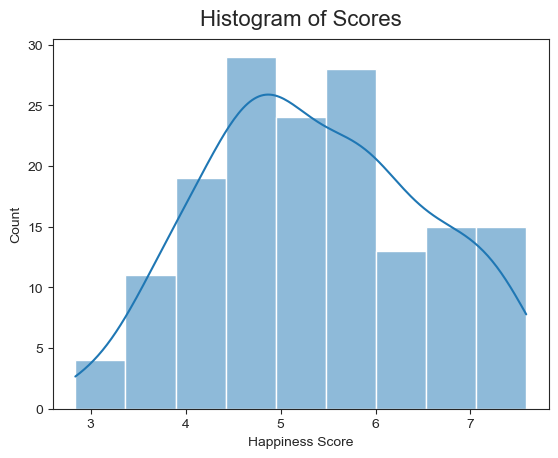

In [39]:
# Plot
sns.histplot(df["Happiness Score"], kde = True)

# Set the title, the labels, and custom ticks

plt.title("Histogram of Scores", fontsize=16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

#Show the plot
plt.show()

Increasing the bin size reveals a grouped pattern in the data distribution. The reasons behind it could be many, such as groups sharing similar GDP, cultural mindset, political status

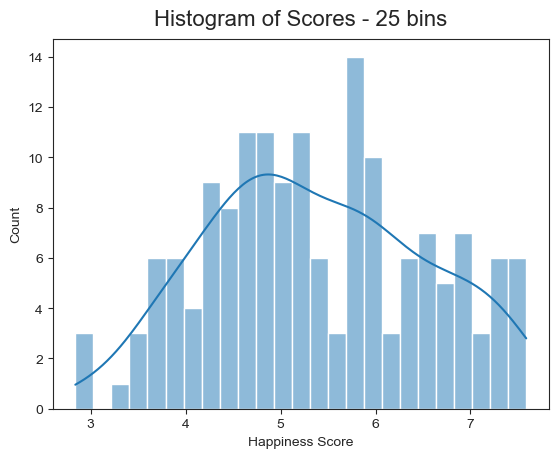

In [40]:
# Plot
sns.histplot(df["Happiness Score"], kde = True, bins = 25)

# Set the title, the labels, and custom ticks

plt.title("Histogram of Scores - 25 bins", fontsize=16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

#Show the plot
plt.show()

## Dataset Correlation 

In [125]:
df.select_dtypes(include='float').corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


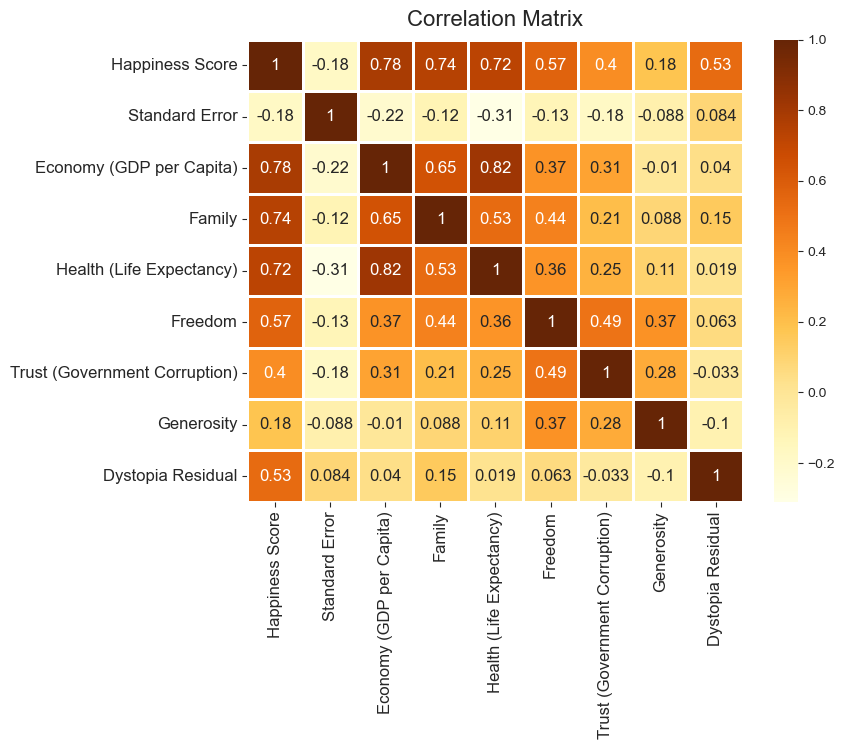

In [126]:
# Correlation between variables
corr = df.select_dtypes(include='float').corr()

# Set the figure size
plt.figure(figsize = (8,6))

# Set the color pallet
cmap = sns.color_palette("YlOrBr", as_cmap=True)

# Plot 
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":12},
                 cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Correlation Matrix', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

Another way of visualizing it is by restricting the correlation matrix to interactions between the Happiness Score and the other features.

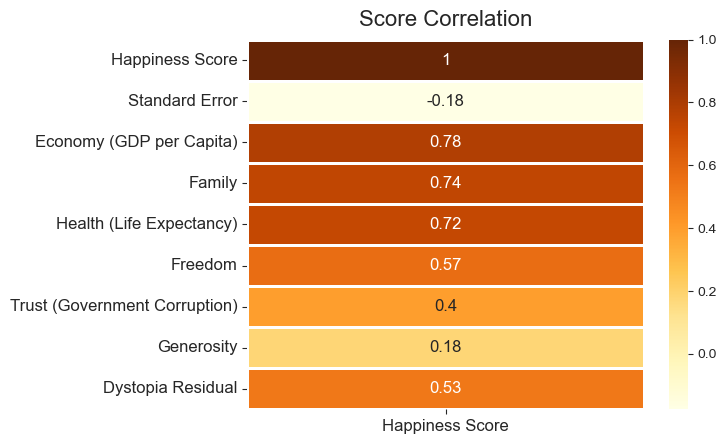

In [127]:
# Score correlation
corr_score = corr[['Happiness Score']]

# Set the color pallet
cmap = sns.color_palette("YlOrBr", as_cmap=True)

# Plot 
ax = sns.heatmap(corr_score, cbar=True, annot=True, annot_kws={"size":12},
                 cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Score Correlation', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

## Machine Learning Algorithm

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (105, 8)
Training target vector size: (105,)
Test feature matrix size: (53, 8)
Test target vector size: (53,)


## Finding Best Random State

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9999999543480629 on Random_state 33


## LinearRegression

In [131]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted result :\n', y_pred)
print('\n')
print('actual result\n',Y_test)

Predicted result :
 [3.78084398 5.12312992 5.00702664 4.7147833  5.10160715 5.58866641
 3.34000793 4.21844416 5.07326316 4.03311181 4.97123627 3.46482361
 2.83890823 5.47370895 6.94023077 6.61124101 3.58689153 7.28601691
 4.56467985 6.57406524 4.87598959 5.71587821 4.89766499 4.33216523
 6.78624599 4.25203871 4.51789809 7.28399234 6.93733557 3.66728446
 3.00623749 7.19982287 4.55063634 4.64236532 4.68075326 3.84500193
 4.29659294 6.81024863 6.29477104 4.29252066 5.84762119 4.63348827
 3.65510301 4.78791055 6.41117662 5.47701882 5.69524696 3.65594964
 4.79955853 4.68556413 7.52702468 7.37812867 4.41932858]


actual result
 145    3.781
86     5.123
92     5.007
107    4.715
87     5.102
68     5.589
154    3.340
133    4.218
89     5.073
136    4.033
93     4.971
153    3.465
157    2.839
71     5.474
17     6.940
27     6.611
151    3.587
8      7.286
116    4.565
29     6.574
98     4.876
63     5.716
96     4.898
127    4.332
24     6.786
132    4.252
118    4.518
9      7.284
18    

## LinearRegression Evaluation Matrix

In [132]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.00021678069686631755
Mean squared error : 6.996088855418856e-08
Root Mean Squared Error: 0.00026450120709401034


 R2 Score :
0.9999999543480629


## Random Forest Regressor Model

In [133]:
rf = RandomForestRegressor(n_estimators = 150 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')

 Error of  RandomForestRegressor(n_estimators=150) :
Mean absolute error : 0.31948716981132086
Mean squared error : 0.16904827348511517
Root Mean Squared Error: 0.41115480476958455


 R2 Score :
0.889690063879888


 Error of  SVR() :
Mean absolute error : 0.10565578052542997
Mean squared error : 0.034201448164947613
Root Mean Squared Error: 0.18493633543721907


 R2 Score :
0.9776823537767578


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.42347169811320734
Mean squared error : 0.28785999999999995
Root Mean Squared Error: 0.536525861445653


 R2 Score :
0.8121612391721269


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.3748623388691954
Mean squared error : 0.22930269475755408
Root Mean Squared Error: 0.4788556095082881


 R2 Score :
0.8503719376163725




 Linear Regression Model Gives maximum R2 Score

## Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv = 5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
Mean Score : 0.9999981871007761
Std deviation : 1.4991023001111373e-06


In [136]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,Y_train)
print("constant: ",model.intercept_)
print("coefficient: ",model.coef_)

constant:  2.880616394307367e-05
coefficient:  [-2.18726489e-04  1.00013988e+00  1.00005329e+00  9.99703628e-01
  9.99609032e-01  9.99949372e-01  1.00016330e+00  1.00005902e+00]


In [139]:
new_data = [[1],[2],[1.25],[1.75],[1.50],[0.75],[1.8],[1.3]]
new_data = pd.DataFrame(new_data).T
new_data

,0,1,2,3,4,5,6,7
0,1.0,2.0,1.25,1.75,1.5,0.75,1.8,1.3


## Prediction

In [140]:
model.predict(new_data)

array([10.34938404])

In [142]:
# calculating the amount of error

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_train,model.predict(X_train))
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  8.041538365250868e-08
RMSE:  0.00028357606325730083


## Saving Model

In [143]:
import joblib
joblib.dump(lin_reg,'WHR.obj')

['WHR.obj']